# Importing the necessary libraries

In [59]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from scipy import stats
from scipy.stats import norm, skew
import warnings
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')

# Reading the Understanding the Data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Checking for nulls and missing values

In [6]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
#Checking the number of missing values and its percentage
Total_missing = df.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*df.isnull().sum()/df.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(80)

,Total_missing_values,Percent_missing_values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


In [8]:
#checking how many columns have more than 50% of the data missing in them
df_missing_values[df_missing_values['Percent_missing_values']>=50]

,Total_missing_values,Percent_missing_values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027


In [9]:
#we drop these columns directly from our analysis as these columns will not help provide any relevant information
df.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'Id'], axis=1, inplace=True)

# Data Cleaning

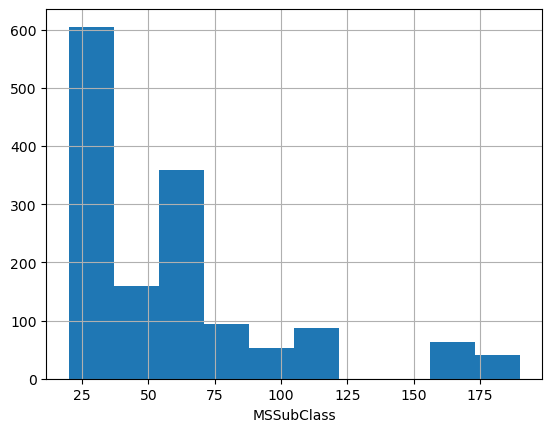

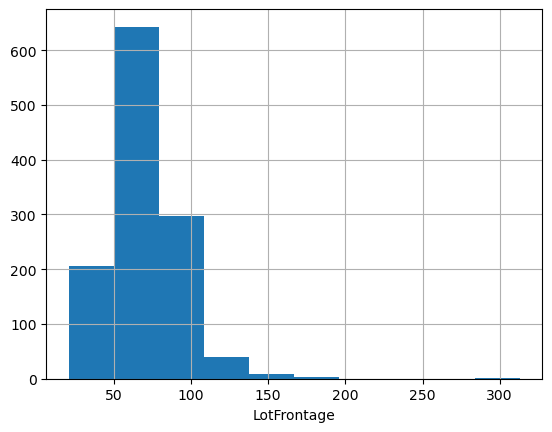

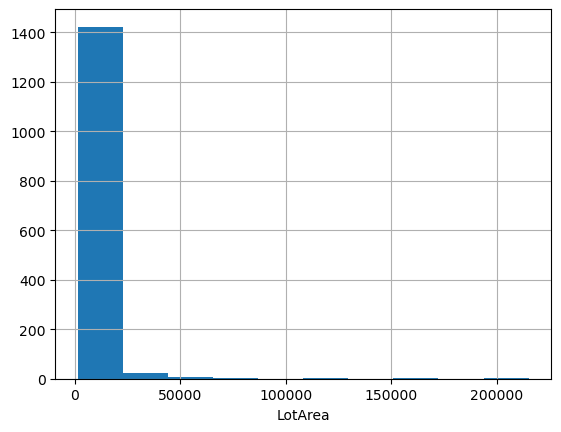

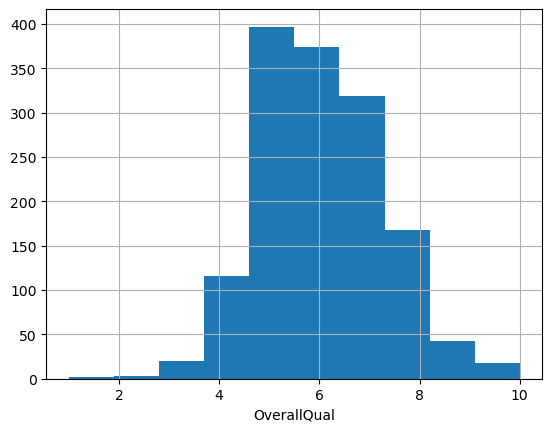

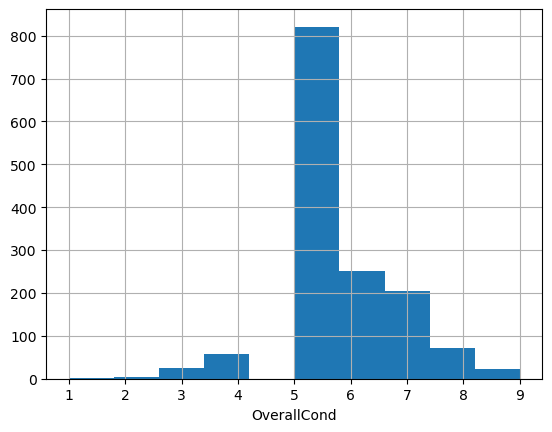

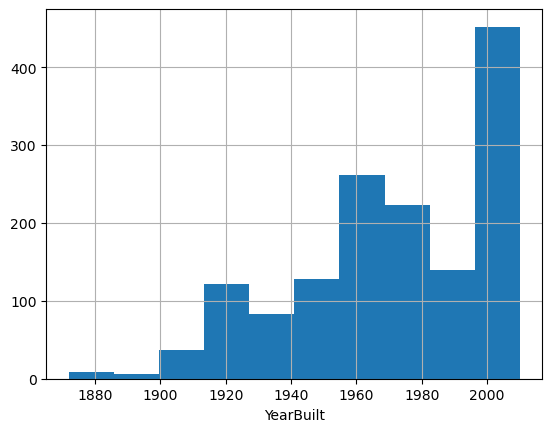

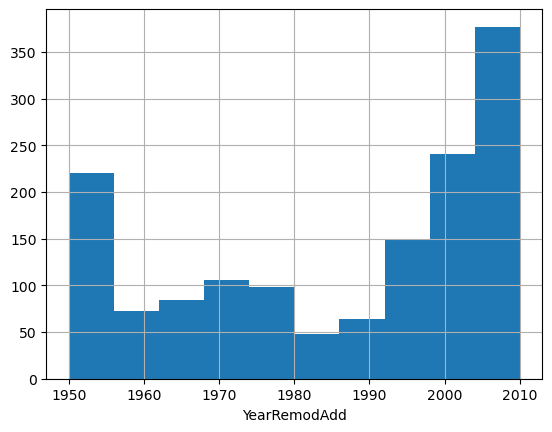

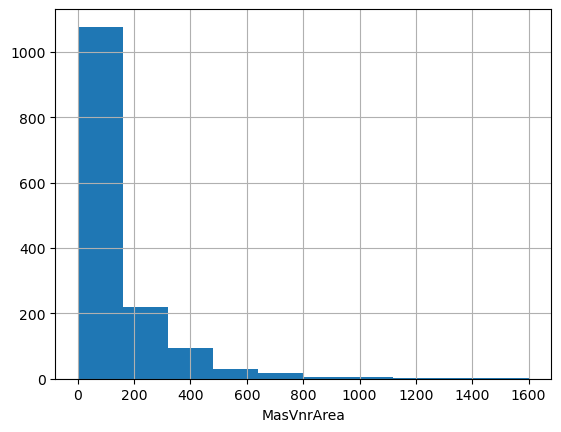

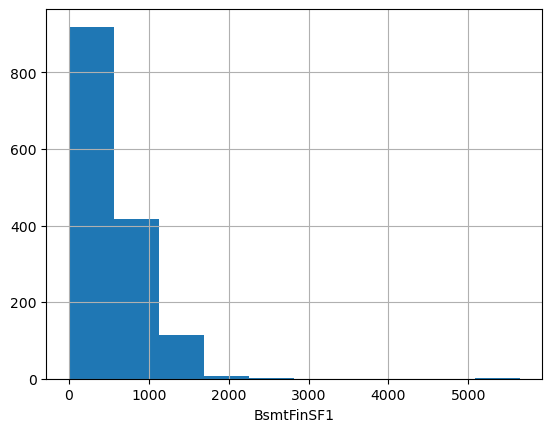

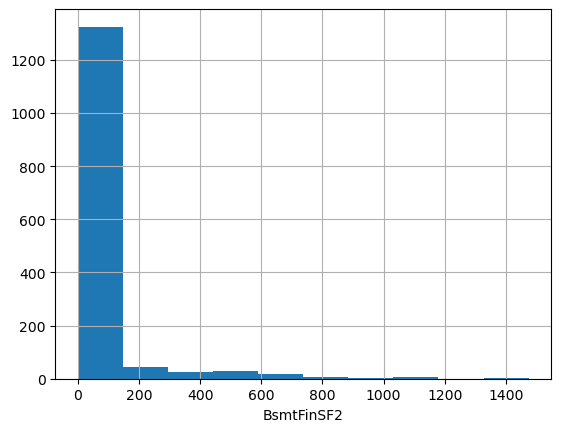

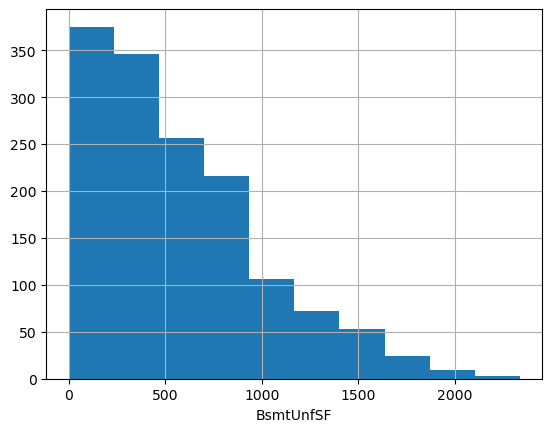

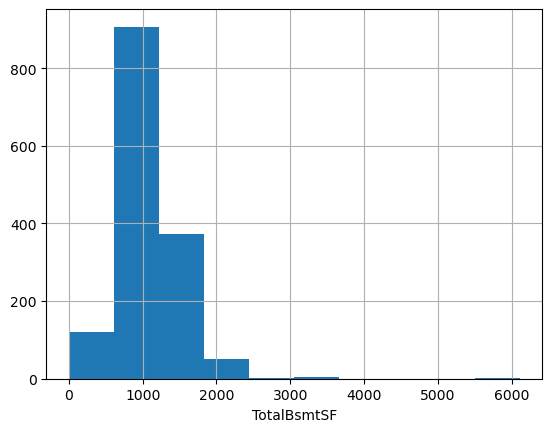

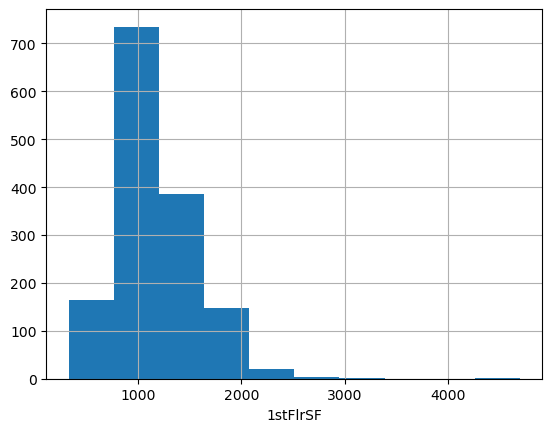

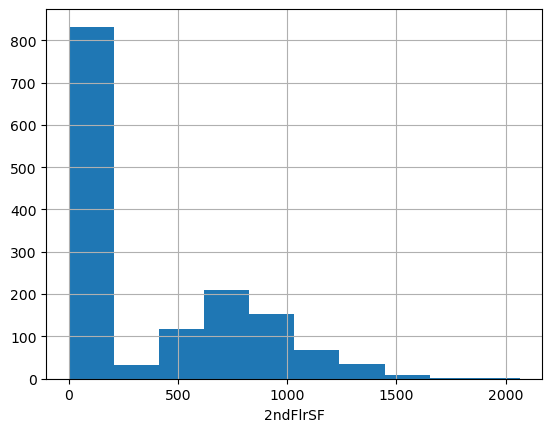

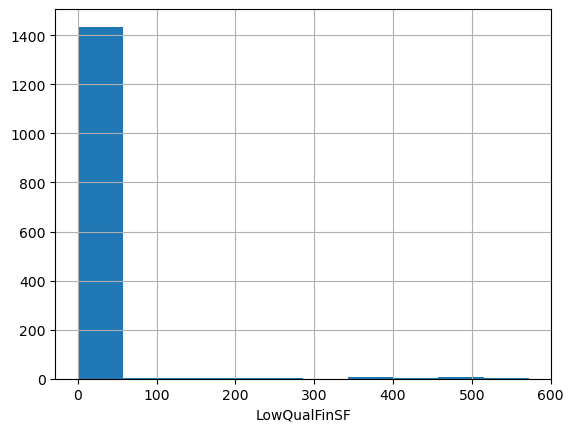

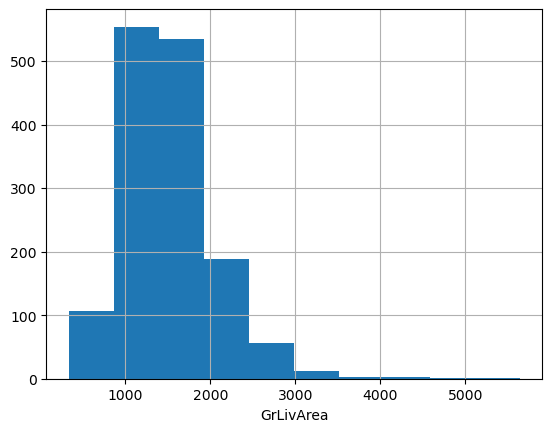

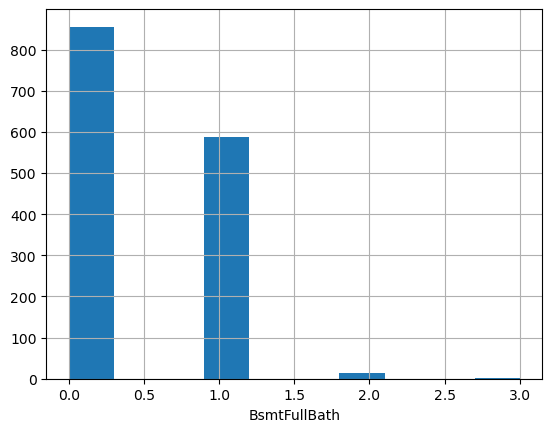

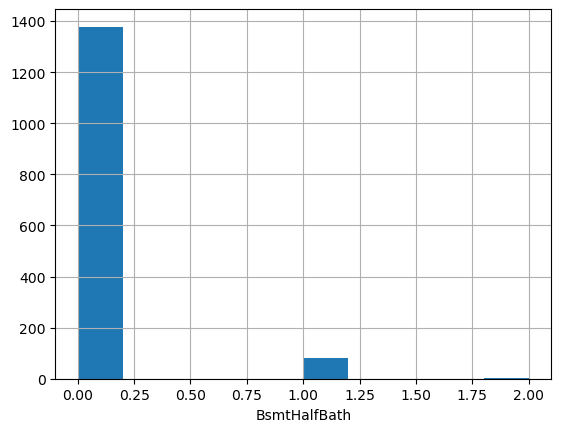

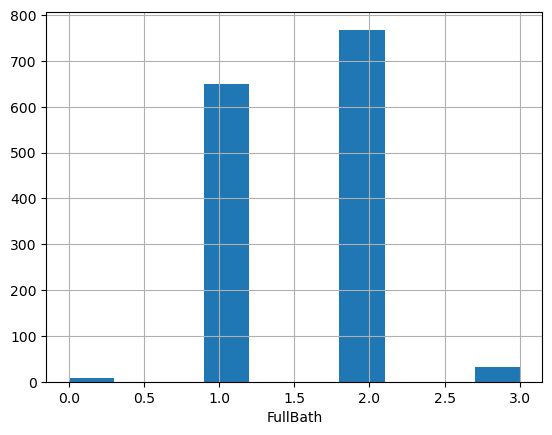

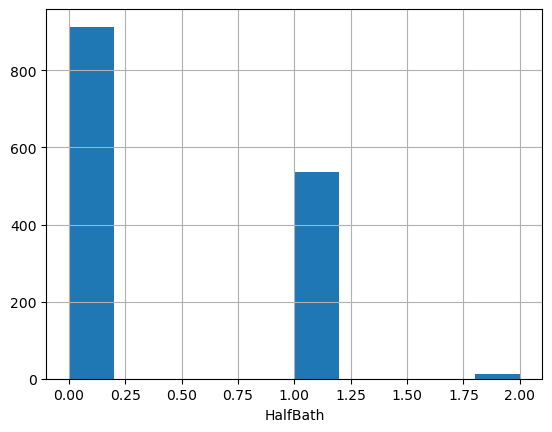

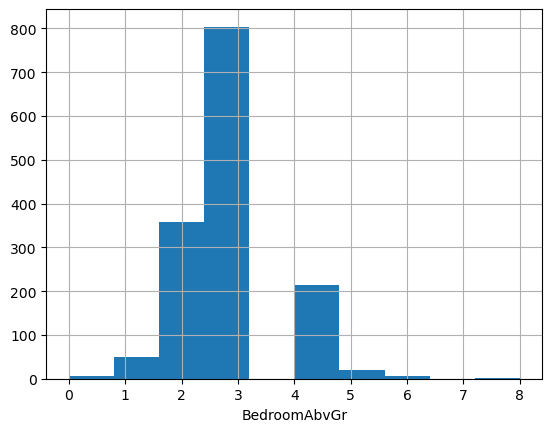

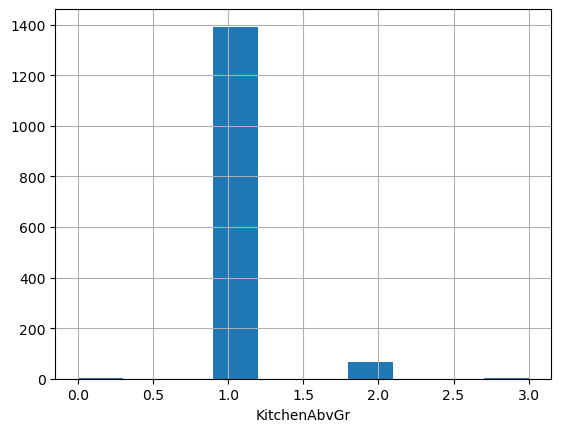

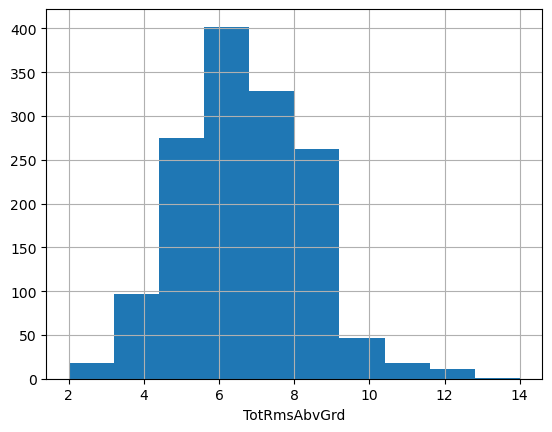

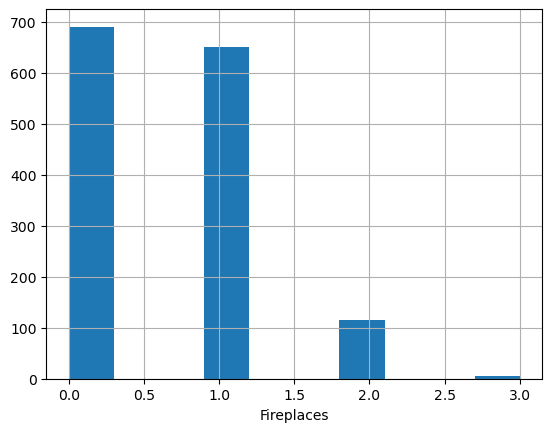

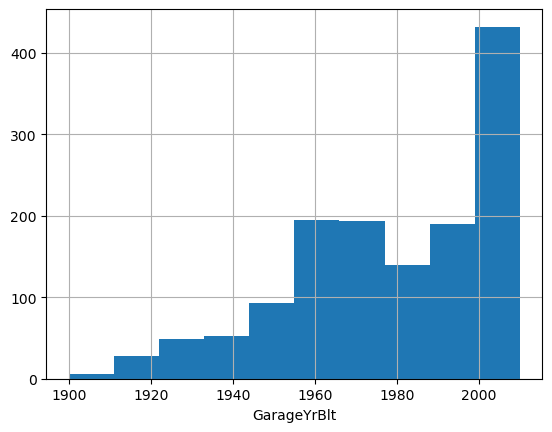

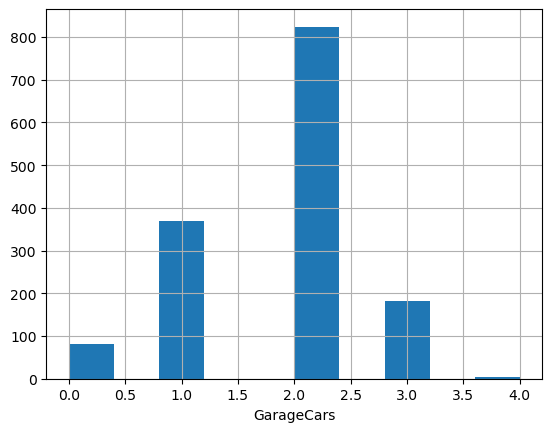

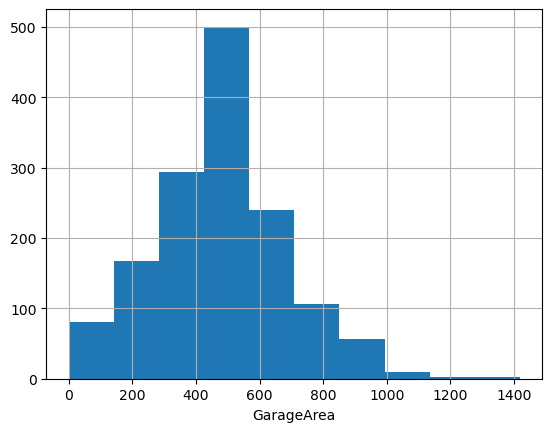

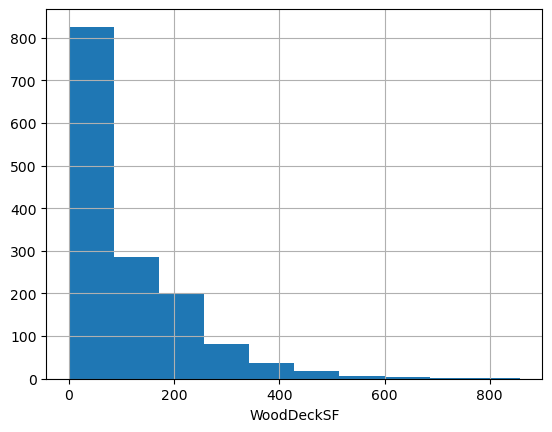

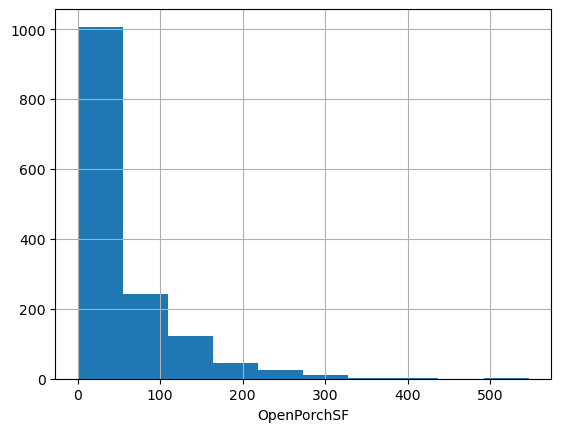

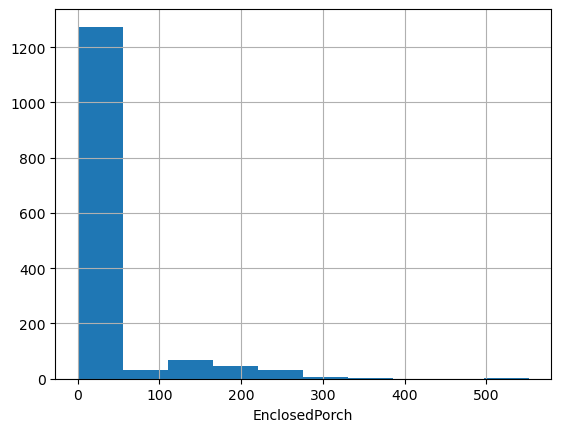

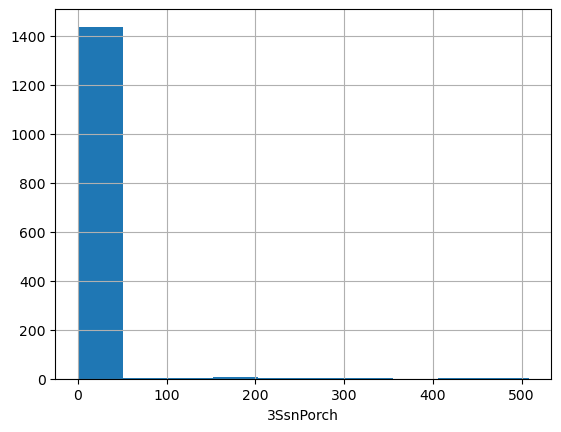

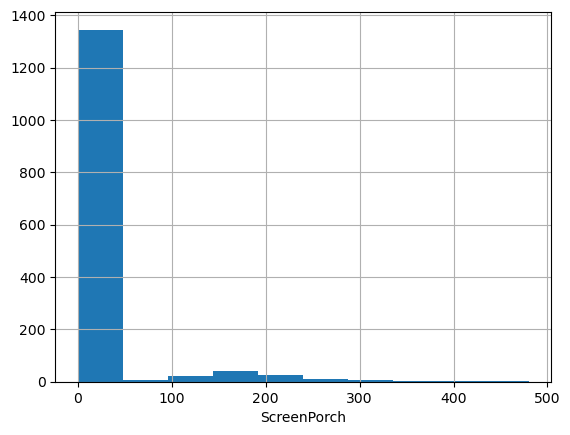

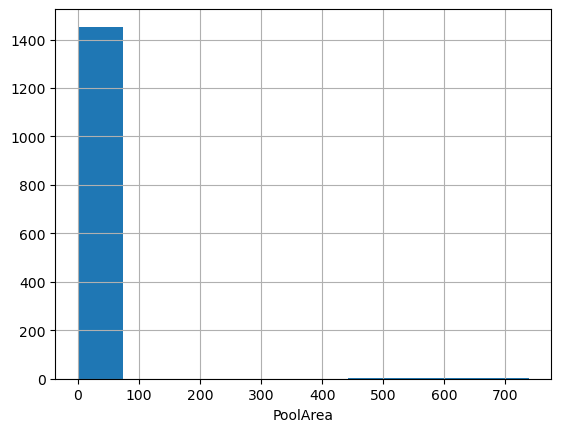

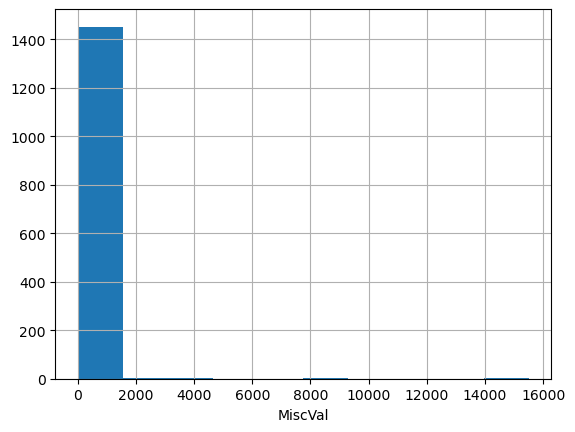

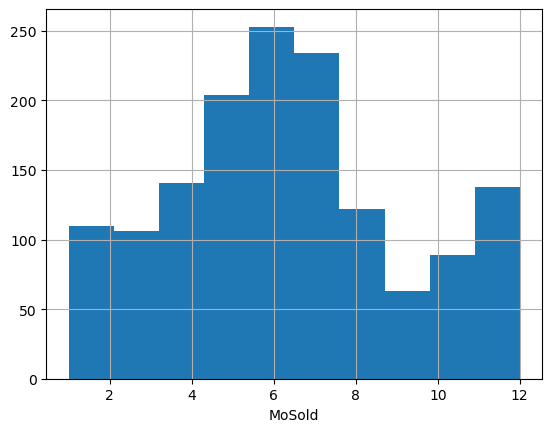

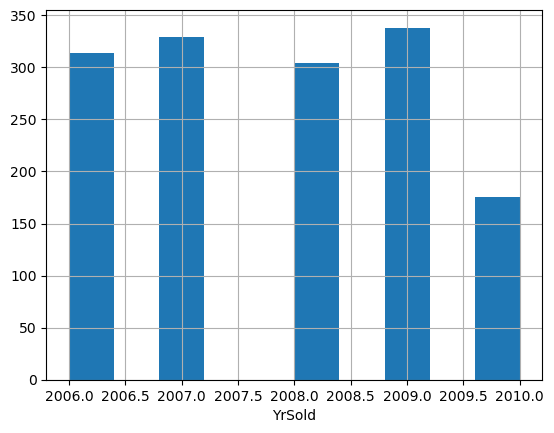

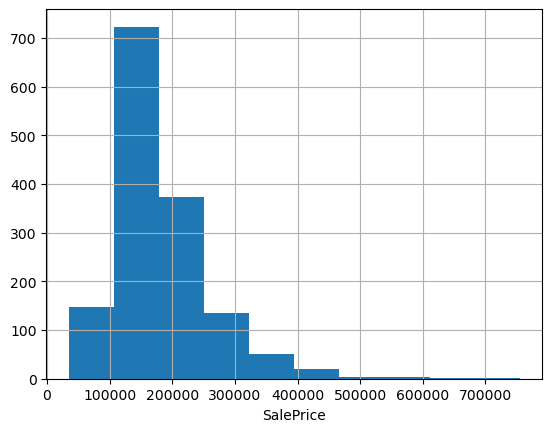

In [10]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:
    
        
        df[feature].hist()
        plt.xlabel(feature)
        plt.show()

In [11]:
# LowQualFinSF, PoolArea, MiscVal and 3SsnPorch have almost no variation and adding these type of variables to the model would result in extra redundancy. It is always a good idea to drop such variables, but before dropping we check the value counts to be sure
print(df['LowQualFinSF'].value_counts())
print(df['PoolArea'].value_counts())
print(df['MiscVal'].value_counts())
print(df['3SsnPorch'].value_counts())

LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: count, dtype: int64
PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64
MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64
3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1


In [12]:
#we move on to drop these columns
df.drop(columns = ['LowQualFinSF','PoolArea','MiscVal','3SsnPorch'], axis=1, inplace=True)

In [13]:
df.shape

(1460, 71)

In [14]:
# rechecking for missing values
columns_nan =  df.columns[df.isnull().any()]

for c in columns_nan:
    print(c, df[c].isnull().sum())

LotFrontage 259
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [15]:
# median imputation
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [16]:
# for categorical variables, we use the mode for imputations
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual', 'Electrical', 'FireplaceQu'):
    
    df[col] = df[col].fillna(df[col].mode()[0])

In [35]:
df['FireplaceQu']

0       Gd
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    Gd
1459    Gd
Name: FireplaceQu, Length: 1460, dtype: object

In [17]:
df.isnull().sum().sum()

0

# Outlier Detection

In [18]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] 

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Exploratory Data Analysis

In [19]:
#numeric columns filtered out first
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,12,2008,250000


<Figure size 1000x500 with 0 Axes>

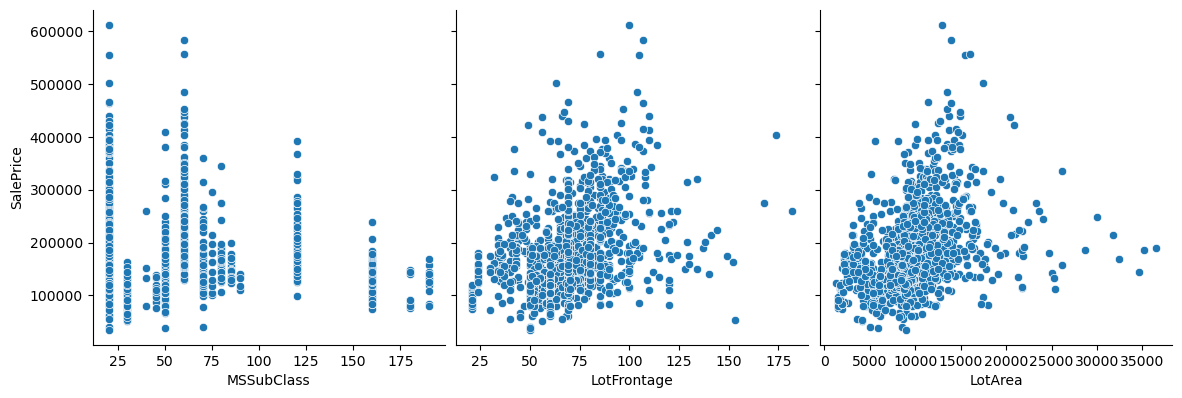

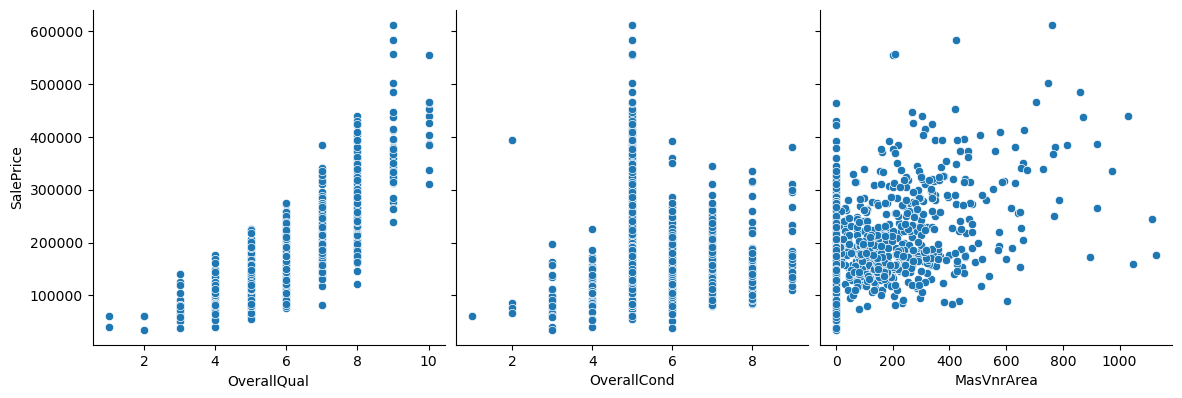

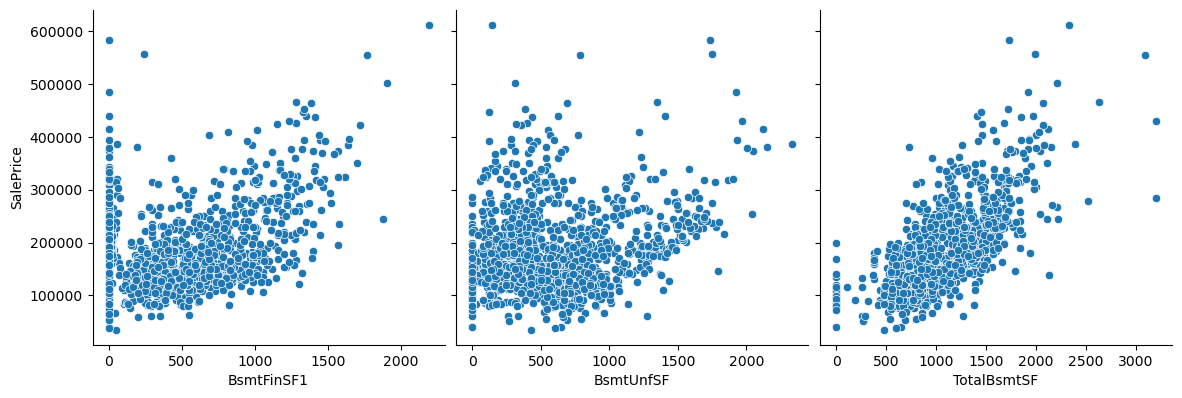

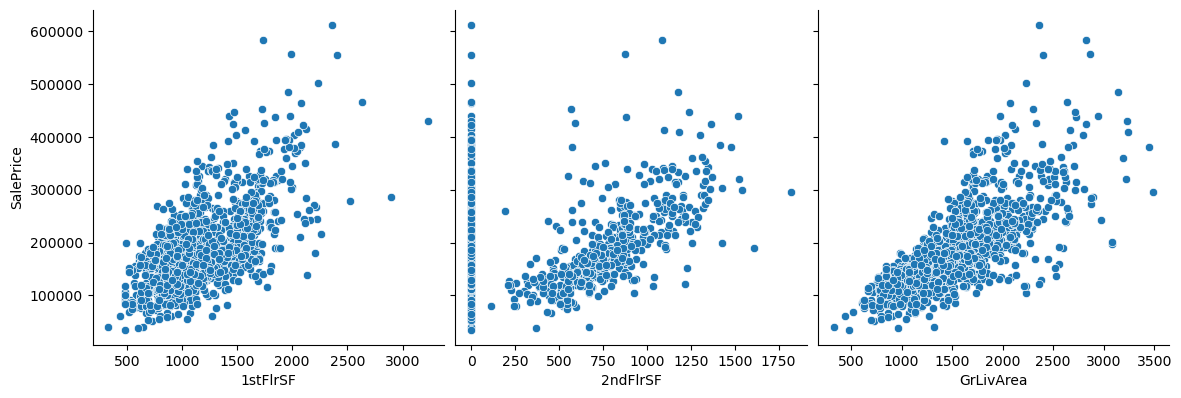

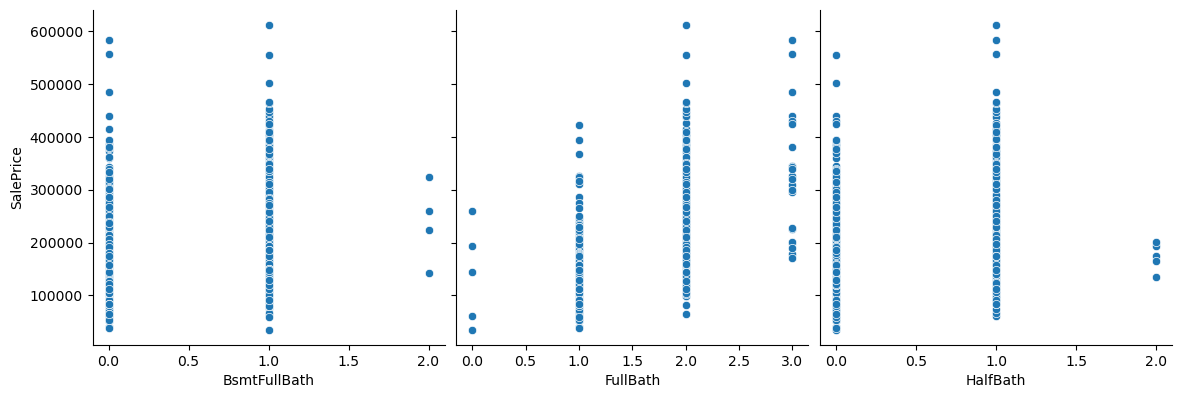

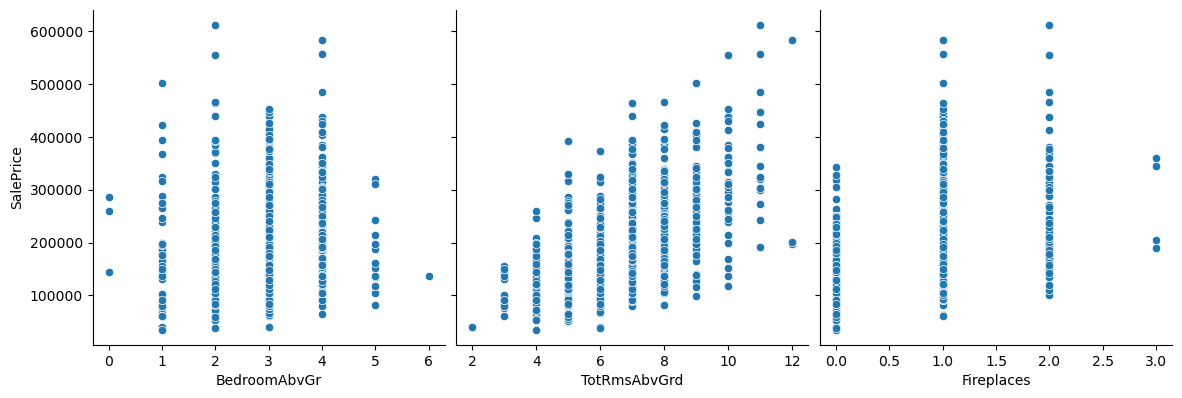

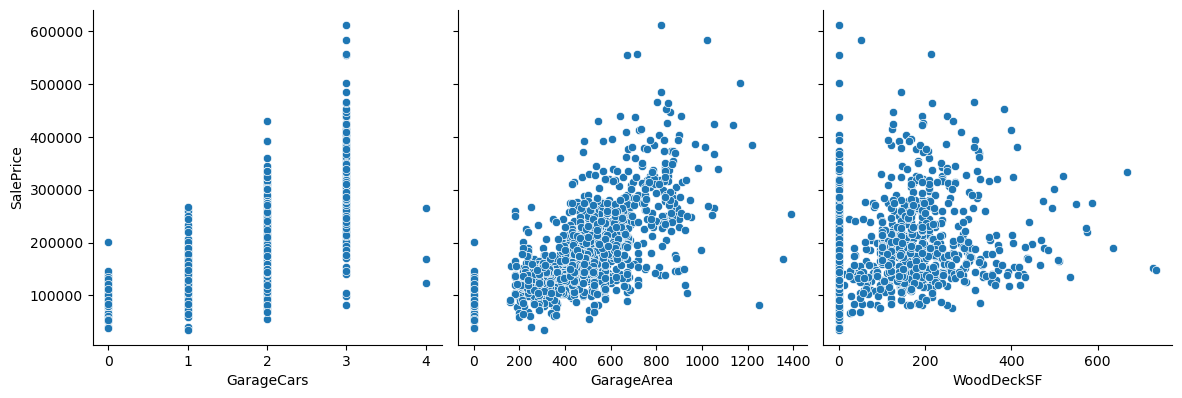

In [20]:
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

### Insight: GrLivArea has the strongest linearity with the dependent variable

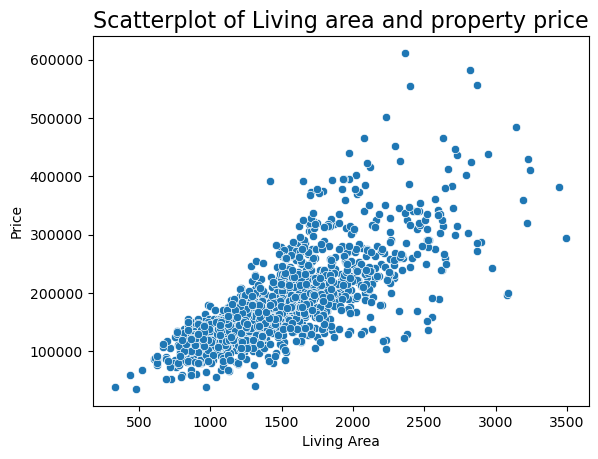

In [21]:
#scatter plot for temperature to count
sns.scatterplot(x='GrLivArea',y='SalePrice' ,data=df)
plt.title('Scatterplot of Living area and property price', fontsize=16)
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

### Insight: There is positive correlation meaning that larger the living area, higher is the price of the house which not a rocket science

In [22]:
corr = df_num.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.425547,-0.372512,0.093568,-0.068312,0.118881,0.087547,0.048586,-0.057058,-0.061048,-0.160187,-0.257911,-0.301250,0.309988,0.046370,0.025093,-0.008811,0.102868,0.228561,-0.119048,NaN,-0.044201,-0.011048,0.124770,-0.003834,-0.074741,0.011925,0.024753,-0.041677,-0.023761,-0.017924,-0.030006,-0.052976
LotFrontage,-0.425547,1.000000,0.526729,0.220060,-0.063988,0.133988,0.079399,0.165461,0.135812,0.037861,0.148522,0.321598,0.364081,0.040980,0.313127,0.056625,-0.013850,0.172413,0.043189,0.261870,NaN,0.321784,0.227115,0.080191,0.290353,0.317449,0.091117,0.123925,-0.000104,0.053106,0.012437,0.015370,0.360687
LotArea,-0.372512,0.526729,1.000000,0.158632,-0.028698,0.054476,0.019139,0.136209,0.186061,0.056191,0.074307,0.300370,0.389969,0.088901,0.372146,0.090548,0.045868,0.166575,0.078653,0.274813,NaN,0.352086,0.300367,0.002089,0.283762,0.321187,0.176458,0.147972,-0.013890,0.093827,-0.010367,-0.018141,0.363991
OverallQual,0.093568,0.220060,0.158632,1.000000,-0.134884,0.594482,0.548493,0.415394,0.203358,-0.109144,0.338616,0.552030,0.496834,0.288280,0.622627,0.099497,-0.057984,0.613939,0.260103,0.141440,NaN,0.499850,0.379625,0.528339,0.625290,0.564754,0.225894,0.318338,-0.126046,0.040562,0.086078,-0.007288,0.806146
OverallCond,-0.068312,-0.063988,-0.028698,-0.134884,1.000000,-0.396008,0.042184,-0.136614,-0.037206,0.049467,-0.153006,-0.190745,-0.141005,0.006844,-0.101142,-0.044253,0.134675,-0.212100,-0.071504,0.015941,NaN,-0.058143,-0.050152,-0.337851,-0.205957,-0.173479,-0.024767,-0.068616,0.081037,0.041587,0.001168,0.042487,-0.121292
YearBuilt,0.118881,0.133988,0.054476,0.594482,-0.396008,1.000000,0.611149,0.315152,0.240937,-0.078532,0.178448,0.427143,0.308710,0.054116,0.265671,0.181886,-0.041551,0.553235,0.238276,-0.033658,NaN,0.173813,0.149401,0.796183,0.572425,0.509830,0.226381,0.254271,-0.388191,-0.042973,0.018259,-0.010942,0.567447
YearRemodAdd,0.087547,0.079399,0.019139,0.548493,0.042184,0.611149,1.000000,0.179898,0.107205,-0.100204,0.208382,0.309117,0.263095,0.150882,0.323810,0.110941,-0.020045,0.495403,0.173512,-0.018494,NaN,0.249797,0.093903,0.624350,0.451437,0.390552,0.191182,0.253294,-0.209257,-0.047794,0.026091,0.046591,0.526517
MasVnrArea,0.048586,0.165461,0.136209,0.415394,-0.136614,0.315152,0.179898,1.000000,0.230565,-0.066045,0.123286,0.359799,0.343659,0.141948,0.378636,0.093667,0.002023,0.273787,0.195881,0.096081,NaN,0.291369,0.256418,0.251663,0.375918,0.378886,0.157370,0.131969,-0.102546,0.058424,-0.005703,0.009243,0.483124
BsmtFinSF1,-0.057058,0.135812,0.186061,0.203358,-0.037206,0.240937,0.107205,0.230565,1.000000,-0.056094,-0.544591,0.455673,0.400085,-0.194420,0.125712,0.656119,0.059480,0.057865,-0.039155,-0.113098,NaN,0.024181,0.225083,0.143553,0.226395,0.275884,0.173257,0.086807,-0.107368,0.074164,-0.004906,0.039701,0.385825
BsmtFinSF2,-0.061048,0.037861,0.056191,-0.109144,0.049467,-0.078532,-0.100204,-0.066045,-0.056094,1.000000,-0.197520,0.066992,0.069755,-0.107792,-0.039273,0.125248,0.103296,-0.084468,-0.059542,0.005480,NaN,-0.036024,0.006519,-0.105180,-0.064699,-0.037398,0.050483,-0.023879,0.054918,0.051395,-0.003287,0.047712,-0.068523


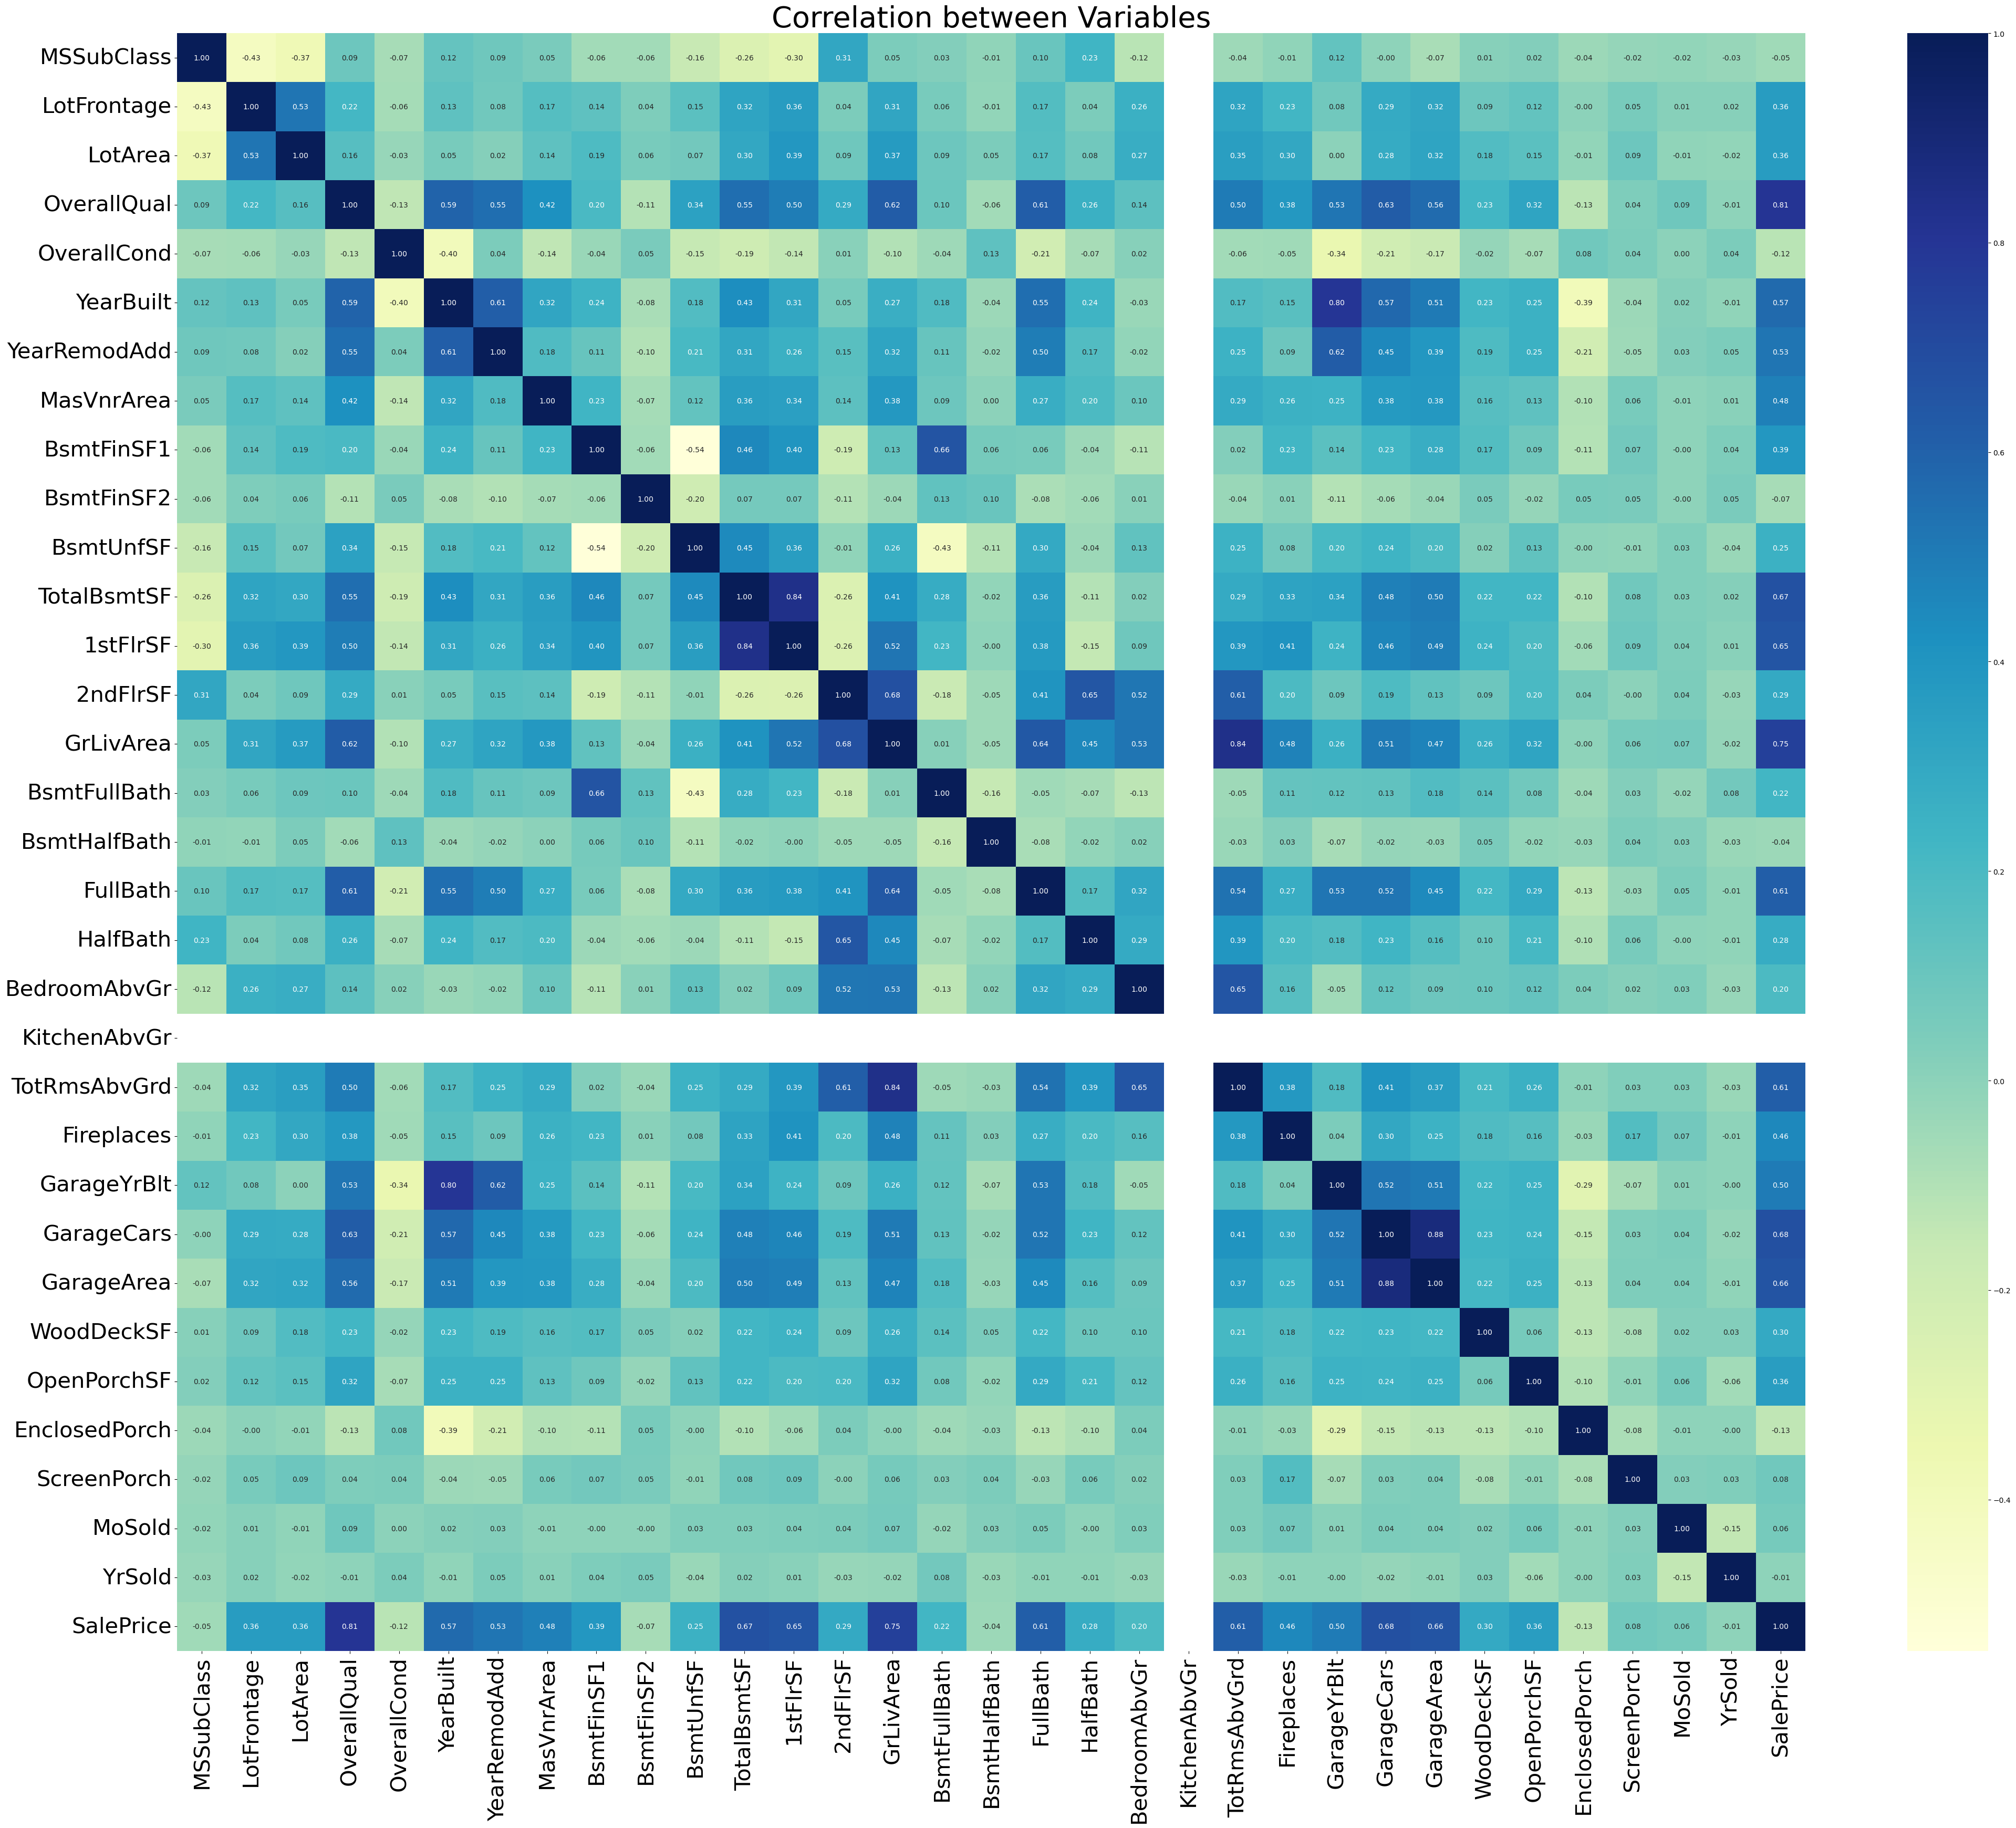

In [23]:
# plotting correlations on a heatmap

plt.figure(figsize=(50,40))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Correlation between Variables", fontsize=40)
plt.show()

### Insights: 
- sale price is positively correlated with the OverallQyual and the GrLiveArea
- Sale price is positively correlated with the TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, GarageCats, GarageArea
- one interesting observation here is that the sale price is not negatively correlated with any of the independent variables


some independent variables are also highly correlated with each other. this is a red flag as it it can cause multicollinearity in the model
- Yearbuilt and GarageYrBlt are correlated
- TotRmsAbvGrd and GrLivArea are correlated
- GarageArea and GarageCars are correlated
- 1stFlrSF and TotalBsmtSF are also correlated

In [24]:
df.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea', 'GarageYrBlt'], axis=1,inplace=True)

# Data Preparation


## Creating Dummy Variables

In [25]:
# filtering out only the categorical data
df_cat = df.select_dtypes(include = ['object'])
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [26]:
# Convert categorical value into Dummy variables (one hot encoding)
df_dummies=pd.get_dummies(df_cat,drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,Fals

### Scaling the data

In [27]:
#dropping categorical variables from the dataset
X = df.drop(list(df_cat.columns), axis=1)

In [28]:
#removing the target variable from X
X.drop(['SalePrice'], axis=1, inplace=True)

In [29]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,854,1710,1,0,2,1,3,1,0,2,0,61,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,0,1262,0,1,2,0,3,1,1,2,298,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,866,1786,1,0,2,1,3,1,1,2,0,42,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,756,1717,1,0,1,0,3,1,1,3,0,35,272,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1053,2198,1,0,2,1,4,1,1,3,192,84,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,2004,2005,0.0,410,0,811,1221,0,1221,1,0,2,0,2,1,0,2,0,113,0,0,10,2009
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,694,1647,0,0,2,1,3,1,1,2,0,40,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,0,2073,1,0,2,0,3,1,2,2,349,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1152,2340,0,0,2,0,4,1,2,1,0,60,0,0,5,2010


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
0,60,-0.214729,-0.301556,0.643699,-0.537949,2003,0.848046,0.557189,0.630373,-0.290924,-0.969815,-0.487945,1.229848,0.474147,1.169112,-0.240343,0.861001,1.237099,0.242585,0.0,-0.973602,0.316608,-0.771856,0.249754,-0.360841,-0.272137,-1.592437,2008
1,20,0.537784,-0.022178,-0.095383,2.183911,1976,-0.461085,-0.593667,1.271641,-0.290924,-0.660993,0.538541,-0.791853,-0.456394,-0.835080,4.047877,0.861001,-0.783993,0.242585,0.0,0.617006,0.316608,1.674266,-0.751685,-0.360841,-0.272137,-0.482424,2007
2,60,-0.064226,0.378669,0.643699,-0.537949,2001,0.799559,0.357551,0.111701,-0.290924,-0.315296,-0.326135,1.258256,0.632007,1.169112,-0.240343,0.861001,1.237099,0.242585,0.0,0.617006,0.316608,-0.771856,-0.062169,-0.360841,-0.272137,0.997592,2008
3,70,-0.465566,-0.034325,0.643699,-0.537949,1915,-0.752003,-0.593667,-0.524852,-0.290924,-0.071004,-0.740774,0.997850,0.488687,1.169112,-0.240343,-1.001069,-0.783993,0.242585,0.0,0.617006,1.688238,-0.771856,-0.177088,4.212685,-0.272137,-1.592437,2006
4,60,0.738454,1.109911,1.382781,-0.537949,2000,0.702587,1.461433,0.510136,-0.290924,-0.186236,0.242731,1.700948,1.487773,1.169112,-0.240343,0.861001,1.237099,1.590718,0.0,0.617006,1.688238,0.804169,0.627346,-0.360841,-0.272137,2.107605,2008


In [30]:
#concat dummy variables along with X
X = pd.concat([X, df_dummies], axis=1)

In [31]:
y = df['SalePrice']

# Train test split

ValueError: Length mismatch: Expected axis has 0 elements, new values have 217 elements

In [32]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,854,1710,1,0,2,1,3,1,0,2,0,61,0,0,2,2008,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state=0)

In [33]:
scaler = StandardScaler()


num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea',   'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , '2ndFlrSF',  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',  'Fireplaces'
           ,   'GarageCars',  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , 'ScreenPorch',  'MoSold']


X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

# Model Building

In [35]:
#RFE: Recursive Feature Elimination
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=35)
rfe = rfe.fit(X_train, y_train)


In [35]:
print(lm.coef_)
print(lm.intercept_)

[-3.27731073e+01  1.20245683e+03  5.10815711e+03  9.74001068e+03
  5.55035547e+03  3.67840276e+02  3.21062599e+03  2.33381577e+03
  6.81192447e+03  1.55641772e+02  5.16463216e+02  8.05026663e+03
  5.81490224e+03  2.35712508e+04  9.45659170e+02  1.92662749e+02
  5.12527564e+02  1.00380224e+01 -1.33124046e+03  6.56655175e-09
  9.36842377e+02  4.73565487e+03  2.32613998e+03  7.08888615e+02
  2.43563317e+02  1.19072413e+03  3.95423375e+02  1.05113091e+02
  1.97705523e+04  2.10217435e+04  7.59048194e+03  5.81960663e+02
  2.82222910e+04 -3.75363701e+03 -2.91552915e+03  2.11541943e+03
  3.05317601e+03 -1.89183528e+04 -3.07088101e+03 -2.57326651e+04
  4.41021844e+03 -9.45147013e+03 -1.19058566e+04 -1.56755061e+03
  6.47462298e+02 -2.52103007e+04  1.74071257e+03  6.83402801e+03
  4.69824407e+03 -1.35825394e+04 -9.31068441e+03  2.31856348e+04
 -1.57341382e+04 -1.05113810e+04 -9.53069572e+02  3.81938336e+02
 -1.49207526e+04 -1.29080418e+04  9.68996046e+03 -1.48629323e+04
  1.63038196e+04  1.40107

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 176),
 ('LotFrontage', False, 137),
 ('LotArea', False, 74),
 ('OverallQual', False, 3),
 ('OverallCond', False, 101),
 ('YearBuilt', False, 162),
 ('YearRemodAdd', False, 39),
 ('MasVnrArea', False, 109),
 ('BsmtFinSF1', False, 28),
 ('BsmtFinSF2', False, 168),
 ('BsmtUnfSF', False, 167),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 78),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 145),
 ('BsmtHalfBath', False, 173),
 ('FullBath', False, 136),
 ('HalfBath', False, 177),
 ('BedroomAbvGr', False, 132),
 ('KitchenAbvGr', False, 179),
 ('Fireplaces', False, 146),
 ('GarageCars', False, 21),
 ('WoodDeckSF', False, 113),
 ('OpenPorchSF', False, 140),
 ('EnclosedPorch', False, 169),
 ('ScreenPorch', False, 131),
 ('MoSold', False, 165),
 ('YrSold', False, 175),
 ('MSZoning_FV', False, 10),
 ('MSZoning_RH', False, 44),
 ('MSZoning_RL', False, 100),
 ('MSZoning_RM', False, 171),
 ('Street_Pave', False, 49),
 ('LotShape_IR2', False, 99),
 ('LotShape_IR3', False, 

In [37]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['TotalBsmtSF', 'GrLivArea', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition2_PosN', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofStyle_Shed', 'RoofMatl_Metal', 'RoofMatl_WdShngl', 'Exterior1st_CBlock', 'Exterior2nd_Stone', 'Exterior2nd_Wd Shng', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_Slab', 'BsmtExposure_Gd', 'Heating_GasW', 'Heating_OthW', 'Electrical_FuseP', 'Electrical_Mix', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Min1', 'Functional_Min2', 'Functional_Sev', 'Functional_Typ', 'GarageQual_Fa', 'GarageQual_Po', 'SaleCondition_Alloca', 'SaleCondition_Partial'], dtype='object')

In [38]:
#skipped columns from RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Family', 'SaleCondition_Normal'], dtype='object', length=182)

# Model building 


In [47]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:34:35   Log-Likelihood:                -10958.
No. Observations:                 949   AIC:                         2.199e+04
Df Residuals:                     913   BIC:                         2.216e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.084e+05   8869.899     23.492      0.000    1.91e+05    2.26e+05
TotalBsmtSF            1.667e+04   1106.455     15.068      0.000    1.45e+04    1.88e+04
GrLivArea              3.314e+04   1082.942     30.603      0.000     3.1e+04    3.53e+04
Neighborhood_Crawfor   3.491e+04   4777.634      7.306      0.000    2.55e+04    4.43e+04
Neighborhood_NoRidge   2.765e+04   5545.154      4.987      0.000    1.68e+04    3.85e+04
Neighborhood_NridgHt   2.632e+04   4321.291      6.090      0.000    1.78e+04    3.48e+04
Neighborhood_StoneBr   5.326e+04   7148.275      7.450      0.000    3.92e+04    6.73e+04
Condition2_PosN       -6577.9432   2.61e+04     -0.252      0.801   -5.78e+04    4.47e+04
Condition2_RRNn        2.641e+04   1.84e+04      1.434      0.152   -9728.154    6.26e+04
HouseStyle_2.5Fin     -5.493e+04   1.51e+04     -3.627      0.000   -8.46e+04   -2.52e+04
RoofStyle_Shed         3.688e+04   2.58e+04      1.431      0.153   -1.37e+04    8.75e+04
RoofMatl_Metal          3.88e+04   2.58e+04      1.506      0.132   -1.18e+04    8.94e+04
RoofMatl_WdShngl      -2.963e+04   1.83e+04     -1.621      0.105   -6.55e+04    6249.819
Exterior1st_CBlock    -2.965e+04   2.86e+04     -1.035      0.301   -8.58e+04    2.66e+04
Exterior2nd_Stone     -2.428e+04   1.88e+04     -1.289      0.198   -6.13e+04    1.27e+04
Exterior2nd_Wd Shng   -1.475e+04   5259.851     -2.804      0.005   -2.51e+04   -4425.358
ExterQual_Fa          -6.464e+04   1.45e+04     -4.455      0.000   -9.31e+04   -3.62e+04
ExterQual_Gd          -3.474e+04   5841.798     -5.947      0.000   -4.62e+04   -2.33e+04
ExterQual_TA          -5.416e+04   6336.209     -8.548      0.000   -6.66e+04   -4.17e+04
Foundation_Slab        2.688e+04   8409.664      3.196      0.001    1.04e+04    4.34e+04
BsmtExposure_Gd        1.889e+04   3408.760      5.541      0.000    1.22e+04    2.56e+04
Heating_GasW          -2.356e+04   8481.150     -2.778      0.006   -4.02e+04   -6914.213
Heating_OthW          -8.533e+04   2.57e+04     -3.319      0.001   -1.36e+05   -3.49e+04
Electrical_FuseP      -2.247e+04   2.56e+04     -0.878      0.380   -7.27e+04    2.77e+04
Electrical_Mix         2.243e+04    3.7e+04      0.606      0.545   -5.02e+04    9.51e+04
KitchenQual_Fa        -5.141e+04   7166.789     -7.173      0.000   -6.55e+04   -3.73e+04
KitchenQual_Gd        -3.101e+04   4079.956     -7.601      0.000    -3.9e+04    -2.3e+04
KitchenQual_TA        -3.893e+04   4611.849     -8.441      0.000    -4.8e+04   -2.99e+04
Functional_Min1        2.639e+04   8886.640      2.969      0.003    8948.080    4.38e+04
Functional_Min2        2.308e+04   8216.874      2.809      0.005    6956.107    3.92e+04
Functional_Sev        -4.889e+04   2.64e+04     -1.849      0.065   -1.01e+05    2997.586
Functional_Typ         

# Ridge Regression

In [62]:
#assuming alpha = 0.001 
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
print(r2_score(y_train, y_train_pred))

0.9452665218994507


In [52]:
# performing cross score validation and using different values of alpha and finding the optimnal paramter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv = folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019333,0.001745,0.006117,0.001863,0.001,{'alpha': 0.001},-16376.521558,-15534.680753,-17607.007469,-17163.369825,-15509.243658,-16438.164653,845.587762,7,-11371.468124,-11397.447200,-10810.652034,-10988.243255,-11303.405933,-11174.243309,233.321762
1,0.016206,0.001953,0.005468,0.000861,0.01,{'alpha': 0.01},-16359.745588,-15392.200374,-17459.561021,-17118.307649,-15482.310396,-16362.425005,835.584915,6,-11374.187937,-11406.021119,-10823.014860,-10995.680262,-11307.541878,-11181.289211,230.852887
2,0.018218,0.000479,0.005533,0.000411,0.5,{'alpha': 0.5},-15820.320590,-13954.429150,-16116.809084,-16276.985405,-14979.922630,-15429.693372,862.707327,4,-11500.445367,-11822.750456,-11129.833294,-11210.897328,-11512.022766,-11435.189842,246.541909
3,0.018580,0.003397,0.005702,0.000653,1.0,{'alpha': 1.0},-15559.546029,-13655.866561,-15912.461645,-15941.106874,-14697.450897,-15153.286401,873.167477,2,-11615.219439,-12039.437950,-11305.753767,-11349.137640,-11663.117686,-11594.533296,263.319020
4,0.019630,0.001988,0.005691,0.000742,10.0,{'alpha': 10.0},-14855.178187,-13680.516237,-15711.703763,-16010.125746,-14027.461518,-14856.997090,909.117040,1,-12670.732765,-13096.082959,-12411.128184,-12450.522223,-12843.272606,-12694.347747,254.476588


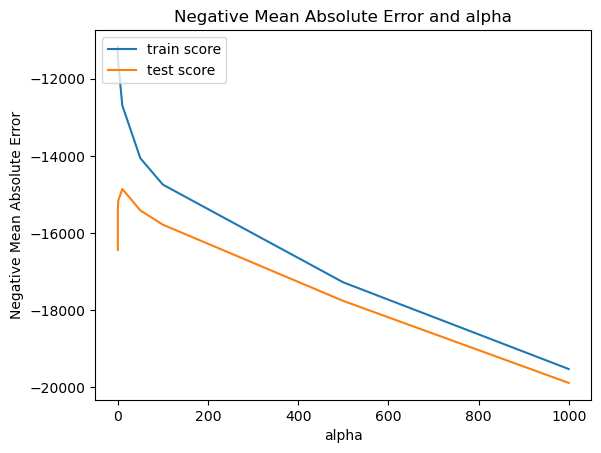

In [54]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
print(model_cv.best_params_)

{'alpha': 10.0}


In [56]:
alpha=10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.27858409e+02  1.82674685e+03  4.13548891e+03  1.19865631e+04
  6.41376018e+03  4.13335038e+02  3.28656586e+03  2.79053282e+03
  7.12899154e+03  5.86777802e+02  7.69041180e+02  8.82515444e+03
  5.17873677e+03  2.30598021e+04  1.44522937e+03 -2.46088987e+02
  7.80065013e+02 -3.19677020e+01 -2.31378194e+03  0.00000000e+00
  2.04874221e+03  4.75484552e+03  1.91067509e+03  6.43513282e+02
  6.16010002e+02  1.01545012e+03  6.39642116e+02  3.44222620e+02
  4.79986262e+03  2.93984249e+03  1.29378092e+03 -6.72785557e+03
  5.16452583e+03 -1.14331959e+03 -2.37230651e+03  5.43684281e+02
  6.10297424e+03 -6.66499416e+03 -1.37328267e+03 -2.18963544e+03
  5.15327289e+03 -5.18429109e+03 -2.98599839e+03  1.11133409e+02
  5.55194263e+02 -2.99044366e+03  2.15776923e+02  2.19844410e+03
  5.66327753e+03 -3.41423648e+03 -6.62896762e+03  1.75818035e+04
 -7.68969383e+03 -7.19969805e+03 -1.70660218e+01  2.22402289e+02
 -9.28468236e+03 -7.77251100e+03  3.70496208e+03 -8.42318103e+03
  1.12154959e+04  1.09947

In [60]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9356050936133956
0.9090252927521657
311884557337.3993
252862014421.43994
328645476.64636385
621282590.7160686


# Lasso Regression

In [63]:
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso,
                       param_grid=params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
print(model_cv.best_params_)

{'alpha': 50}


In [76]:
alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=50)

In [77]:
lasso.coef_

array([-1.36611799e+02,  1.62182484e+03,  3.91649067e+03,  1.06639407e+04,
        6.43908911e+03,  4.36515142e+02,  2.99048454e+03,  2.35142037e+03,
        5.72943672e+03,  1.10730985e+02, -0.00000000e+00,  8.13691671e+03,
        3.22323018e+03,  2.45535598e+04,  1.66010724e+03, -1.21673738e+02,
        4.91706963e+02, -0.00000000e+00, -1.56532391e+03,  0.00000000e+00,
        1.47791863e+03,  4.78709988e+03,  2.00145542e+03,  8.30878814e+02,
        2.88510240e+02,  9.94939261e+02,  4.78635779e+02,  2.38201385e+02,
        7.38271416e+03,  0.00000000e+00, -0.00000000e+00, -6.25079185e+03,
        8.08319786e+03, -0.00000000e+00, -0.00000000e+00,  9.79789669e+02,
        5.77140627e+03, -8.98185230e+03, -4.73824427e+01, -0.00000000e+00,
        4.21694003e+03, -5.99334886e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.88794137e+03, -0.00000000e+00, -3.02943340e+03,  2.63203111e+04,
       -6.48244642e+03, -

In [67]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9375061764937218
0.9094122411737775
302677021743.9383
251786500574.50433
318943120.910367
618640050.5516077


In [79]:

# house_pricing_lasso: Features and coefficienst of Lasso

house_pricing_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
house_pricing_lasso = house_pricing_lasso[house_pricing_lasso['Coefficient'] != 0.00]
house_pricing_lasso.reset_index(drop=True, inplace=True)
house_pricing_lasso

,Features,Coefficient
0,MSSubClass,-136.6118
1,LotFrontage,1621.8248
2,LotArea,3916.4907
3,OverallQual,10663.9407
4,OverallCond,6439.0891
5,YearBuilt,436.5151
6,YearRemodAdd,2990.4845
7,MasVnrArea,2351.4204
8,BsmtFinSF1,5729.4367
9,BsmtFinSF2,110.7310


In [81]:
house_pricing_lasso.sort_values(by = ['Coefficient'], ascending=False)

,Features,Coefficient
47,Neighborhood_StoneBr,49098.3226
36,Neighborhood_Crawfor,26320.3111
12,GrLivArea,24553.5598
114,SaleCondition_Partial,20075.1857
43,Neighborhood_NoRidge,20073.5778
44,Neighborhood_NridgHt,15941.8286
99,Functional_Typ,14372.2189
58,Exterior1st_BrkFace,11125.3798
80,BsmtExposure_Gd,10816.7757
74,Foundation_Slab,10811.2411


# Subjective Questions

In [73]:
#Q1. Double the values of alpha for lasso and ridge
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[-1.29134880e+02  2.06384254e+03  3.93378126e+03  1.26757117e+04
  6.53453038e+03  4.08115573e+02  3.33005820e+03  3.17283375e+03
  7.36197056e+03  5.24503853e+02  9.00292970e+02  9.20739814e+03
  5.33702041e+03  2.23132223e+04  1.58227455e+03 -2.95203837e+02
  9.93490153e+02  8.95234942e+01 -2.60119941e+03  0.00000000e+00
  2.54309090e+03  4.90493638e+03  1.84616474e+03  6.60845635e+02
  7.37433326e+02  9.61996189e+02  6.73444788e+02  3.80631659e+02
  3.53997709e+03  1.47945884e+03  2.03606157e+03 -5.97538754e+03
  2.77714638e+03 -6.04696896e+02 -1.71854874e+03  9.56712969e+01
  5.04296038e+03 -4.65770880e+03 -1.92824095e+03 -1.19090575e+03
  4.67285588e+03 -3.87129704e+03 -1.73037172e+03  4.51541292e+02
  8.92916692e+02 -2.13652063e+03  1.49996595e+02  1.18433191e+03
  4.66586981e+03 -2.35409818e+03 -5.76728965e+03  1.41498981e+04
 -5.63971539e+03 -5.96881622e+03  3.93342403e+01  3.02854518e+02
 -6.73838120e+03 -6.28248017e+03  2.38912964e+03 -6.70631909e+03
  8.29801381e+03  9.59243

In [75]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[-1.34848574e+02  1.78172837e+03  3.40031493e+03  1.17389265e+04
  6.48571733e+03  4.51591980e+02  3.06048765e+03  2.53670933e+03
  5.74582389e+03  0.00000000e+00 -0.00000000e+00  7.86699970e+03
  2.56408415e+03  2.53835087e+04  1.79656771e+03 -0.00000000e+00
  3.99879261e+02 -0.00000000e+00 -1.70373080e+03  0.00000000e+00
  1.54672670e+03  4.96075890e+03  1.86486855e+03  6.43174306e+02
  3.39338052e+02  9.33603257e+02  3.87058153e+02  3.06013174e+02
  5.69149932e+03  0.00000000e+00 -0.00000000e+00 -5.89278040e+03
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.57865974e+02
  4.12787662e+03 -4.94617214e+03 -0.00000000e+00 -0.00000000e+00
  3.25637091e+03 -3.70875889e+03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.33985238e+03 -0.00000000e+00 -1.12703696e+03  2.52103878e+04
 -3.37184608e+03 -1.14710171e+03  0.00000000e+00  0.00000000e+00
 -3.91070529e+03 -4.40248288e+03  0.00000000e+00 -4.17430290e+03
  1.84122138e+04  1.67668

Q3 drop teh top 5 features and rebuid lasso
The top 5 features for the lasso model are:
Neighborhood_StoneBr
Neighborhood_Crawfor
GrLivArea
SaleCondition_Partial
Neighborhood_NoRidge

In [82]:
drop_cols = ['Neighborhood_StoneBr',
'Neighborhood_Crawfor',
'GrLivArea',
'SaleCondition_Partial',
'Neighborhood_NoRidge']

X_train.drop(labels = drop_cols, axis=1, inplace= True)
X_test.drop(labels = drop_cols, axis=1, inplace=True)
print(X_train.shape)
print(X_test.shape)

(949, 212)
(407, 212)


In [83]:
lasso2 = Lasso(alpha=50)
lasso2.fit(X_train, y_train)
y_train_pred2 = lasso2.predict(X_train)
y_test_pred2 = lasso2.predict(X_test)


In [84]:
house_pricing_lasso2 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso2.coef_.round(4)})
house_pricing_lasso2 = house_pricing_lasso2[house_pricing_lasso2['Coefficient'] != 0.00]
house_pricing_lasso2.reset_index(drop=True, inplace=True)
house_pricing_lasso2

,Features,Coefficient
0,MSSubClass,-149.1918
1,LotFrontage,1704.4406
2,LotArea,6111.9293
3,OverallQual,13762.1743
4,OverallCond,6225.1115
5,YearBuilt,296.2673
6,YearRemodAdd,3966.4292
7,MasVnrArea,3083.4825
8,BsmtFinSF1,6918.7280
9,BsmtFinSF2,734.2847


In [85]:
house_pricing_lasso2.sort_values(by = ['Coefficient'], ascending=False)

,Features,Coefficient
82,Foundation_Slab,39922.2804
128,SaleCondition_Alloca,26077.7316
11,2ndFlrSF,24113.7170
10,TotalBsmtSF,19926.9460
25,Street_Pave,17502.3754
126,SaleType_New,16746.4154
3,OverallQual,13762.1743
66,Exterior1st_BrkFace,12214.0447
65,RoofMatl_WdShake,10593.8796
117,GarageType_Basment,8019.5757
